# SENCE 2023 Examples - 1. Semester

## Secret messages

In [1]:
from itertools import cycle
import base64

### Key definition

In [2]:
KEY = """THIS IS A SUPER SECRET CODE. ONLY SHARE IT WITH A TRUSTED PERSON.
SHARE IT ONCE, BEFORE SENDING ANY MESSAGE. DO NOT SEND IT WITH THE ENCRYPTED MESSAGE.
It should be random and long.
This isn't random or very long. An alternative would be
   secrets.token_bytes(4096)
, written to a file.
This method is very secure for the first message, but weak if
multiple messages are encoded with the same key.
"""

### Secret message

In [3]:
MESSAGE = """My super secret message. Just a test.😀🤯"""

### Functions

In [4]:
def encode_message(message: str, key: str = KEY) -> bytes:
    """Encode message with key as one-time pad"""
    pairs = zip(message.encode(), cycle(key.encode()))
    encrypted = [a ^ b for a, b in pairs]
    return base64.b85encode(bytes(encrypted))

def decode_message(encoded_message: bytes, key: str = KEY) -> str:
    """Decode message with key as one-time pad"""
    encoded_bytes = base64.b85decode(encoded_message)
    decrypted = bytes(a ^ b for a, b in
                      zip(encoded_bytes, cycle(key.encode())))
    return decrypted.decode()

### Encode

In [5]:
encoded_message = encode_message(MESSAGE)
encoded_message
# This message could be shared safely over an untrusted channel.

b'88K-fRXH|NVN*6XA|NIJJ|Hk5Br`>AZw@eBRBtbAEkz(aZ=%|`$)vyY<^'

### Decode

In [6]:
decode_message(encoded_message.decode())

'My super secret message. Just a test.😀🤯'

In [7]:
decode_message(b'88K-fRXH|NVN*6XA|NIJJ|Hk5Br`>AZw@eBRBtbAEkz(aZ=%|`$)vyY<^')

'My super secret message. Just a test.😀🤯'

## Merit-Order

Notebook : https://python.ericduminil.com/merit_order.html

![Merit Order Diagram](output/merit_order.jpeg)

## Contour Plots

[Seaborn](https://seaborn.pydata.org/) has been updated (current version in Anaconda : 0.12.2), and [`sns.kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) has a slightly different syntax than before

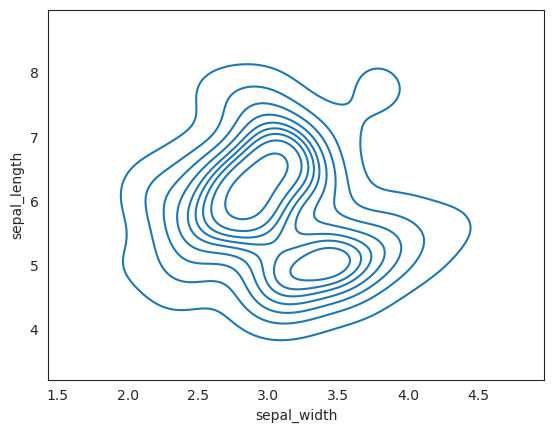

In [8]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('iris')
 
# set seaborn style
sns.set_style("white")

# Basic 2D density plot
sns.kdeplot(data=df, x='sepal_width', y='sepal_length')
plt.show()

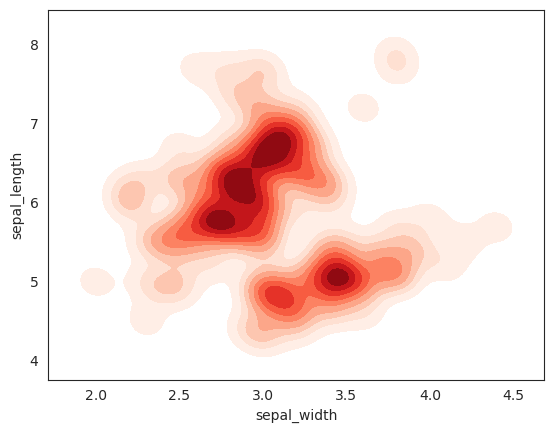

In [9]:
# Custom the color, add shade and bandwidth
sns.kdeplot(data=df, x='sepal_width', y='sepal_length', cmap="Reds", fill=True, bw_adjust=.5)
plt.show()

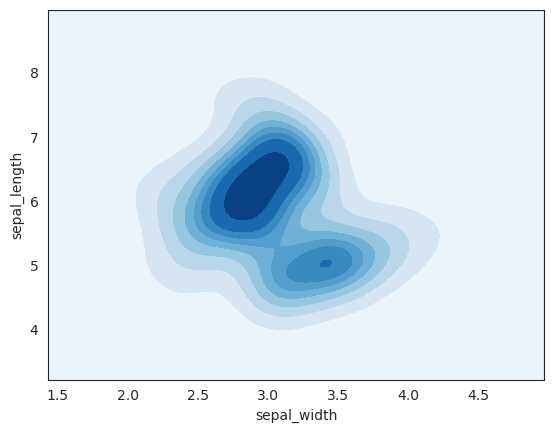

In [10]:
# Add thresh parameter
sns.kdeplot(data=df, x='sepal_width', y='sepal_length', cmap="Blues", fill=True, thresh=0)
plt.show()

## Map with connections between cities

In [11]:
# libraries
#! pip install basemap
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Set the plot size for this notebook:
plt.rcParams["figure.figsize"]=15,12

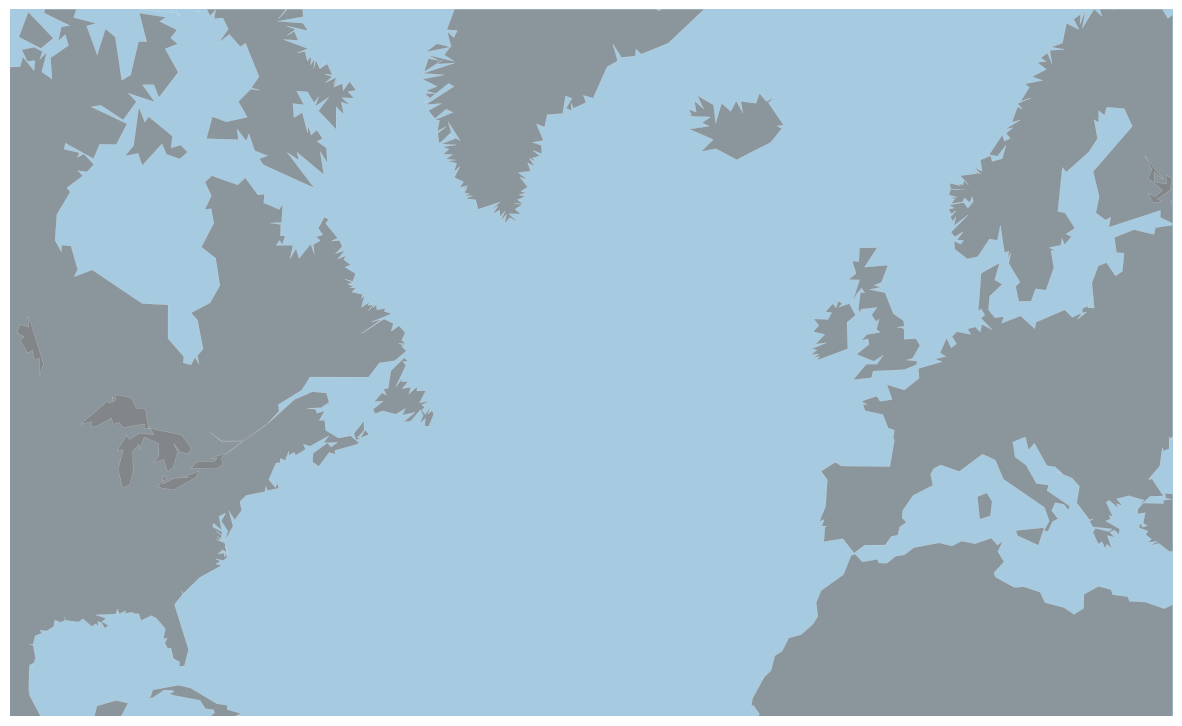

In [13]:
# A basic map
m=Basemap(llcrnrlon=-100, llcrnrlat=20, urcrnrlon=30, urcrnrlat=70, projection='merc')
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.7, lake_color='grey')
m.drawcoastlines(linewidth=0.1, color="white");

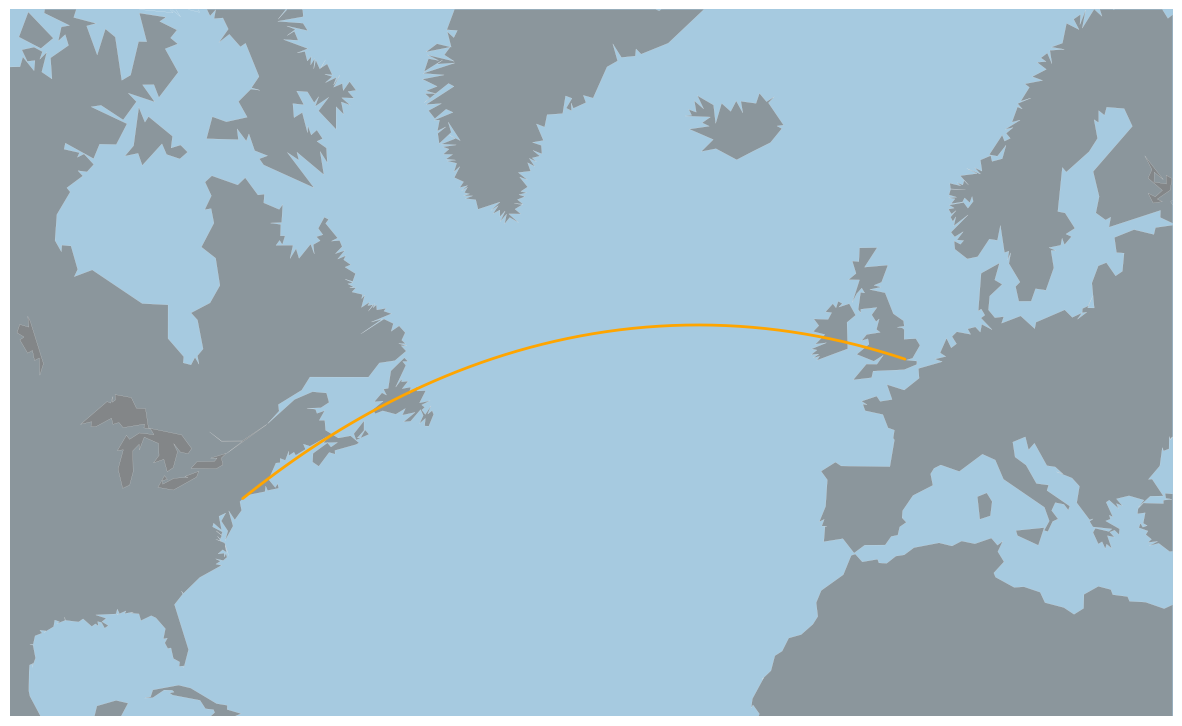

In [14]:
# Background map
m=Basemap(llcrnrlon=-100, llcrnrlat=20, urcrnrlon=30, urcrnrlat=70, projection='merc')
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.7, lake_color='grey')
m.drawcoastlines(linewidth=0.1, color="white")

# Add a connection between new york and London
startlat = 40.78; startlon = -73.98
arrlat = 51.53; arrlon = 0.08
m.drawgreatcircle(startlon, startlat, arrlon, arrlat, linewidth=2, color='orange');

In [15]:
# Dataframe: list of a few cities with their coordinates:
import pandas as pd
import pandas as pd
cities = {
    'city': ["Paris", "Melbourne", "Saint.Petersburg", "Abidjan", "Montreal", "Nairobi", "Salvador"],
    'lon': [2, 145, 30.32, -4.03, -73.57, 36.82, -38.5],
    'lat': [49, -38, 59.93, 5.33, 45.52, -1.29, -12.97]
    }
df = pd.DataFrame(cities, columns = ['city', 'lon', 'lat'])
df

city     lon    lat
0             Paris    2.00  49.00
1         Melbourne  145.00 -38.00
2  Saint.Petersburg   30.32  59.93
3           Abidjan   -4.03   5.33
4          Montreal  -73.57  45.52
5           Nairobi   36.82  -1.29
6          Salvador  -38.50 -12.97

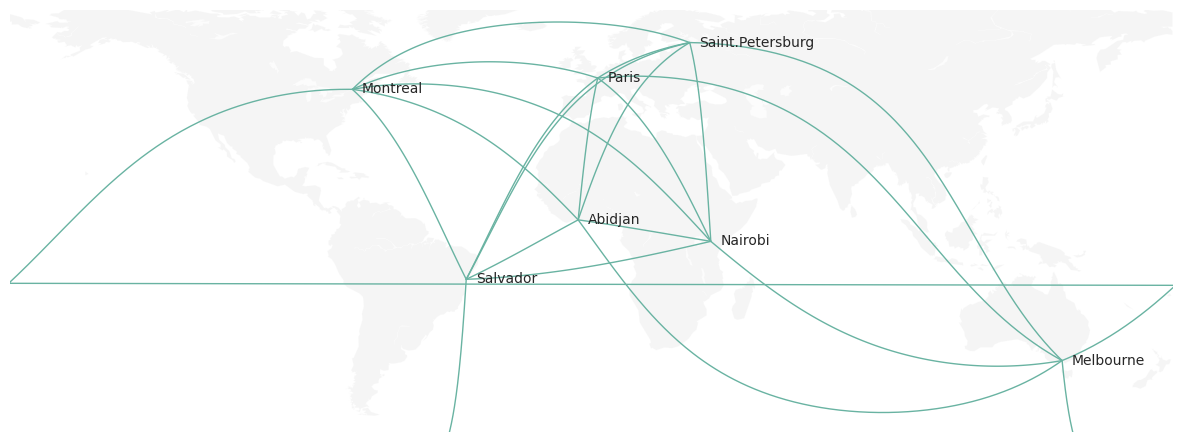

In [16]:
# Background map
m=Basemap(llcrnrlon=-179, llcrnrlat=-60, urcrnrlon=179, urcrnrlat=70,  projection='cyl')
m.drawmapboundary(fill_color='white', linewidth=0)
m.fillcontinents(color='#f2f2f2', alpha=0.7)
m.drawcoastlines(linewidth=0.1, color="white")

# Loop on every pair of cities to add the connection
for startIndex, startRow in df.iterrows():
    for endIndex in range(startIndex + 1, len(df.index)):
        endRow = df.iloc[endIndex]
        # print(f"{startRow.city} -> {endRow.city}")
        m.drawgreatcircle(startRow.lon, startRow.lat, endRow.lon, endRow.lat, linewidth=1, color='#69b3a2');

# Add city names
for i, row in df.iterrows():
    plt.annotate(row.city, xy=m(row.lon+3, row.lat), verticalalignment='center')

## Beeswarm

* https://python-graph-gallery.com/beeswarm/

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [18]:
my_variable = np.random.normal(loc=10, scale=5, size=500)

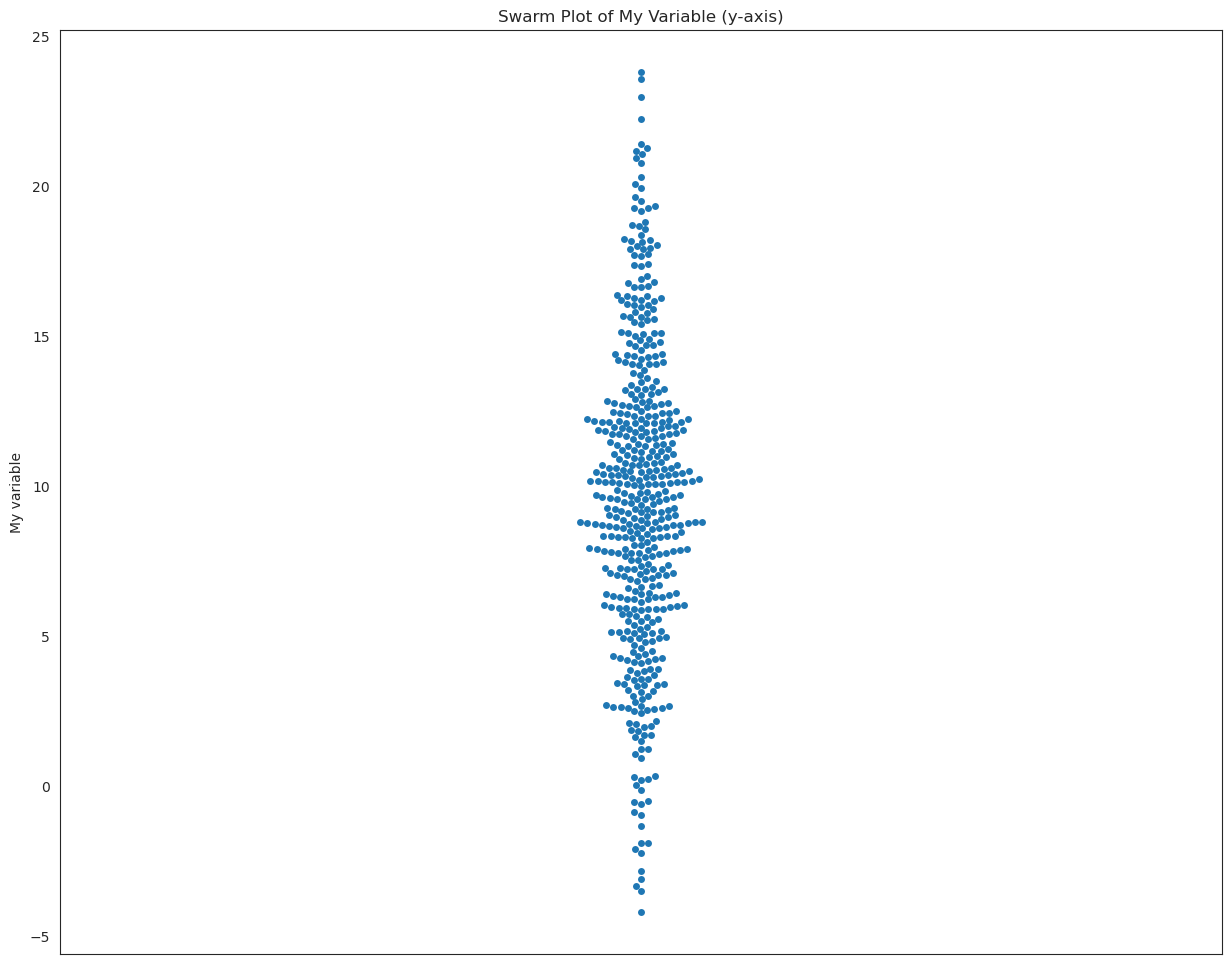

In [19]:
# Create the swarm plot
sns.swarmplot(y=my_variable)

# Customization
plt.title('Swarm Plot of My Variable (y-axis)')  # Set the title
plt.ylabel('My variable')  # Set the label for the y-axis

plt.show() # Display the chart

## Network Charts

https://python-graph-gallery.com/500-network-chart-with-edge-bundling/

In [20]:
# Import useful libraries
import matplotlib.pyplot as plt
import networkx as nx
#! pip install netgraph
from netgraph import Graph

In [21]:
# Create a modular graph (dummy data)
partition_sizes = [10, 20, 30, 40]
g = nx.random_partition_graph(partition_sizes, 0.5, 0.1)

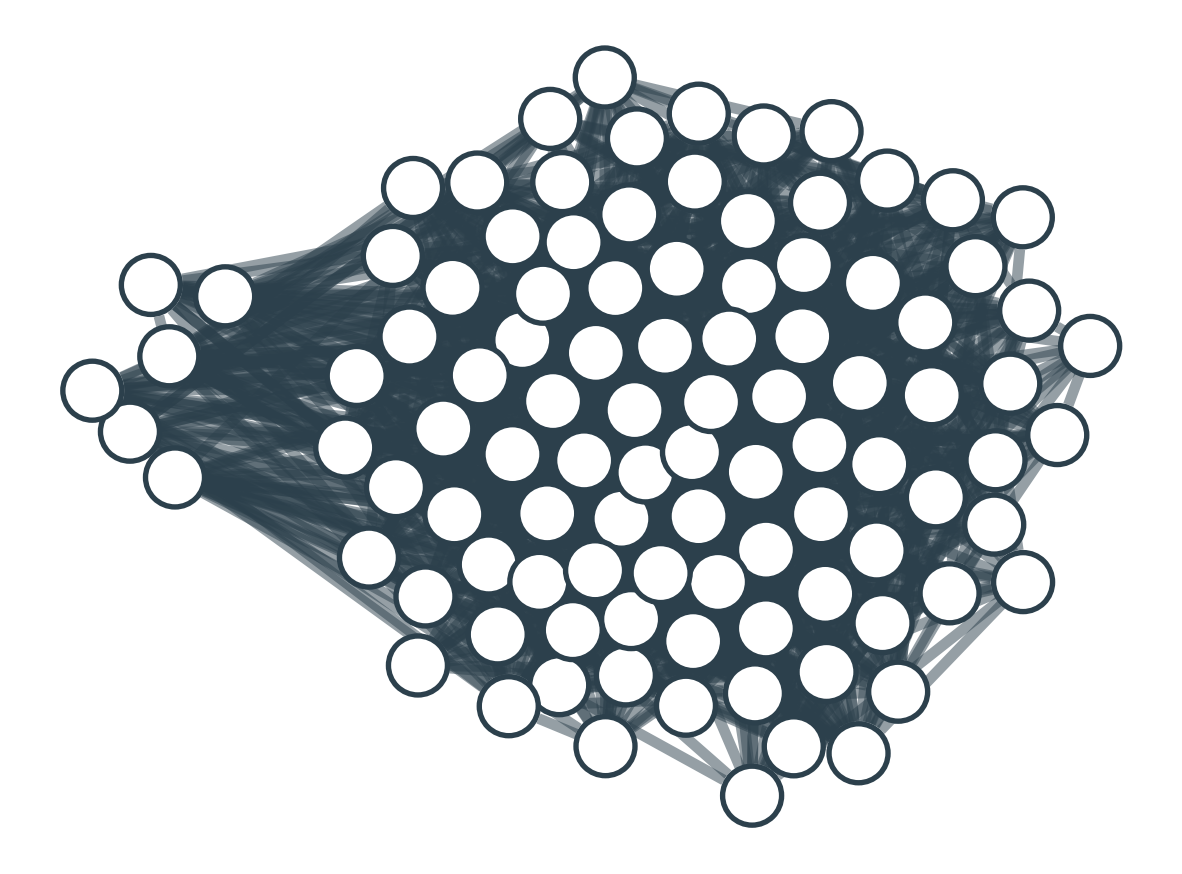

In [22]:
%%capture --no-display
# ^ Hide annoying warning for this cell

# Build graph
Graph(g);

In [23]:
node_to_community = dict()
node = 0
for community_id, size in enumerate(partition_sizes):
    for _ in range(size):
        node_to_community[node] = community_id
        node += 1

# Color nodes according to their community.
community_to_color = {
    0 : 'tab:blue',
    1 : 'tab:orange',
    2 : 'tab:green',
    3 : 'tab:red',
}
node_color = {node: community_to_color[community_id] \
              for node, community_id in node_to_community.items()}

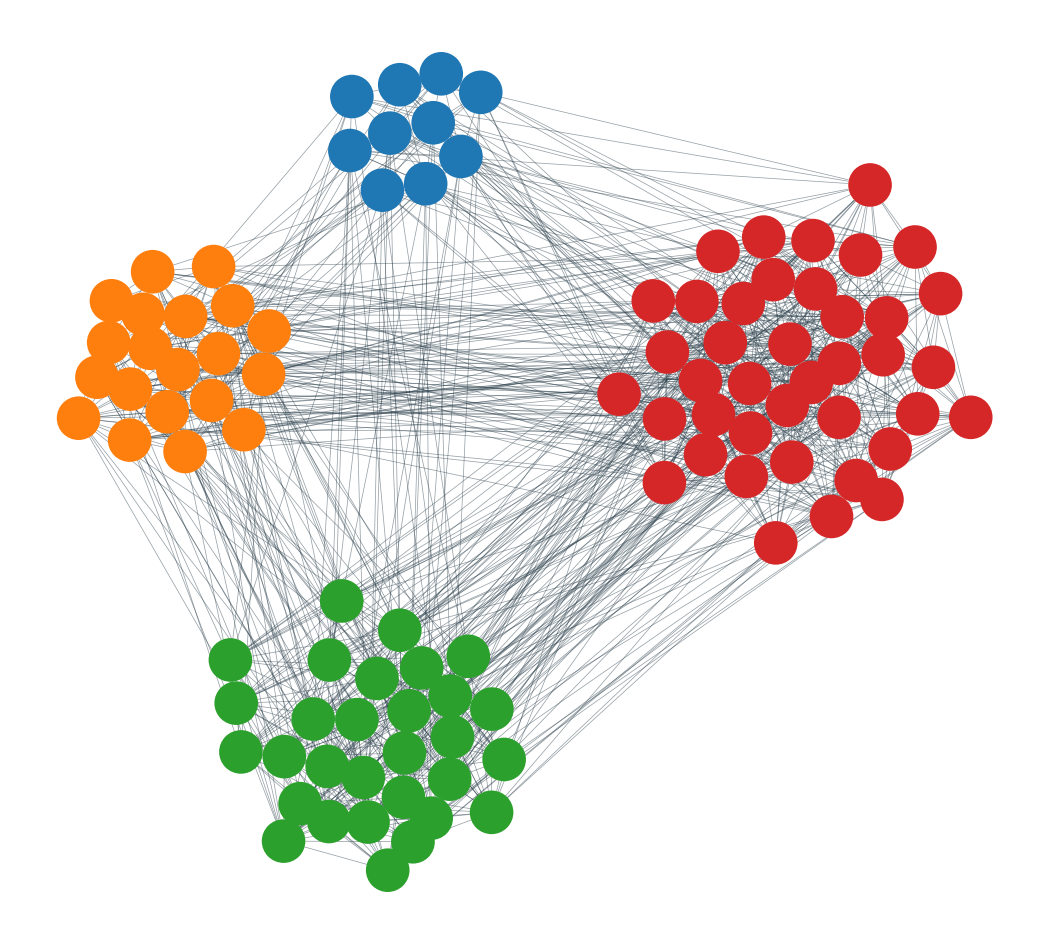

In [24]:
fig, ax = plt.subplots()
Graph(g,
      node_color=node_color, # indicates the community each belongs to  
      node_edge_width=0,     # no black border around nodes 
      edge_width=0.1,        # use thin edges, as they carry no information in this visualisation
      edge_alpha=0.5,        # low edge alpha values accentuates bundles as they appear darker than single edges
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),
      ax=ax,
)
plt.show()

## Chess

In [25]:
import chess

In [26]:
board = chess.Board()

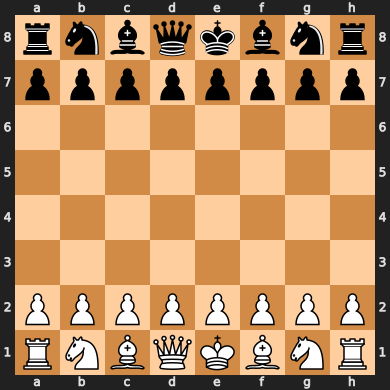

In [27]:
board

In [28]:
board.legal_moves

<LegalMoveGenerator at 0x7f37479d8400 (Nh3, Nf3, Nc3, Na3, h3, g3, f3, e3, d3, c3, b3, a3, h4, g4, f4, e4, d4, c4, b4, a4)>

In [29]:
chess.Move.from_uci("a8a1") in board.legal_moves

False

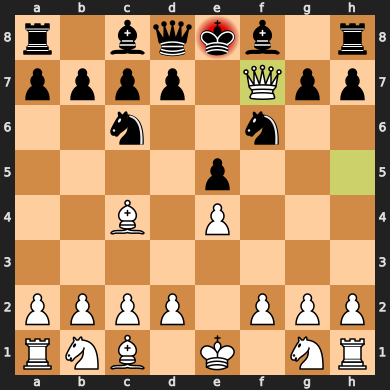

In [30]:
board.push_san("e4")

board.push_san("e5")

board.push_san("Qh5")

board.push_san("Nc6")

board.push_san("Bc4")

board.push_san("Nf6")

board.push_san("Qxf7")

board

In [31]:
board.is_checkmate()

True

## Stock prices

In [32]:
#! pip install mplfinance
#! pip install yfinance
import mplfinance as mpf
import yfinance as yf #(for the dataset)
from datetime import datetime, timedelta

[*********************100%%**********************]  1 of 1 completed


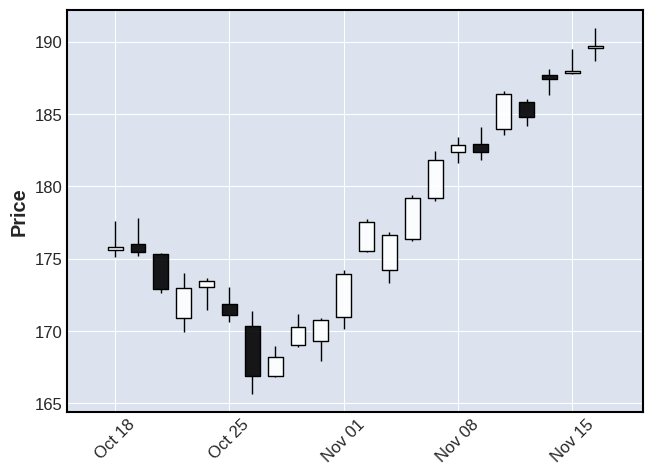

In [33]:
today = datetime.today()
one_month_ago = today - timedelta(days=30)

# Define the stock symbol and date range
stock_symbol = "AAPL"  # Example: Apple Inc.

# Load historical data
stock_data = yf.download(stock_symbol, start=one_month_ago, end=today)

# plot
mpf.plot(stock_data, type='candle')

## Music with Python

https://python.ericduminil.com/Music%20with%20Python.html